In [2]:
import os
from os import path
from datetime import datetime
import pandas as pd

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 5)

sns.set_theme(style="darkgrid")

In [7]:
filename = path.join('..', 'data', 'raw', 'BOLETIM_DIARIO_CORONAVIRUS_SAP.xlsx')

assert path.exists(filename), f"Caminho para o arquivo não existe:\n{filename}"

In [8]:
frame = pd.read_excel(filename,
                   index_col="DATA",
                   parse_dates=['DATA'])

In [9]:
frame.head()

,DESCARTADOS,EM INVESTIGACAO,CONFIRMADOS,EXAMINADOS,RECUPERADOS,ATIVOS,HOSPITAL,DOMICILIO,OBITOS
DATA,,,,,,,,,
2020-07-03,690,263,105,1058,63,38,3,35,4
2020-07-04,709,251,109,1069,65,43,3,40,4
2020-07-05,711,252,110,1073,71,35,3,32,4
2020-07-06,722,293,121,1136,79,38,2,36,4
2020-07-07,794,264,126,1184,85,37,4,33,4


In [10]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 182 entries, 2020-07-03 to 2020-12-31
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   DESCARTADOS      182 non-null    int64
 1   EM INVESTIGACAO  182 non-null    int64
 2   CONFIRMADOS      182 non-null    int64
 3   EXAMINADOS       182 non-null    int64
 4   RECUPERADOS      182 non-null    int64
 5   ATIVOS           182 non-null    int64
 6   HOSPITAL         182 non-null    int64
 7   DOMICILIO        182 non-null    int64
 8   OBITOS           182 non-null    int64
dtypes: int64(9)
memory usage: 14.2 KB


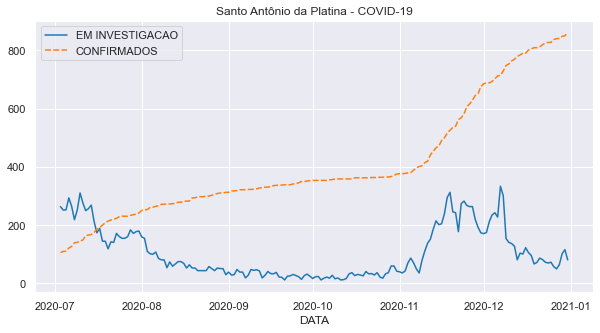

In [14]:
ax = sns.lineplot(data=frame[['EM INVESTIGACAO', 'CONFIRMADOS']],
             palette="tab10"
            )

_ = ax.set_title("Santo Antônio da Platina - COVID-19")

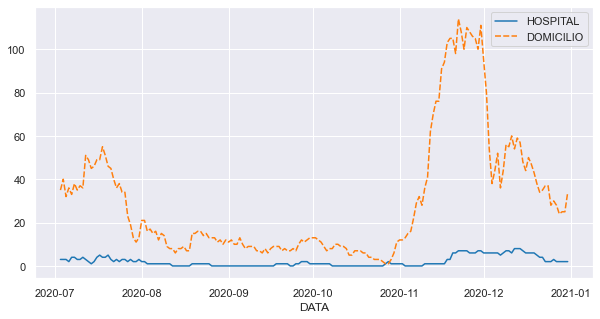

In [15]:
sns.lineplot(data=frame[['HOSPITAL', 'DOMICILIO']],
             palette="tab10"
            )
_ = ax.set_title("Santo Antônio da Platina - COVID-19")

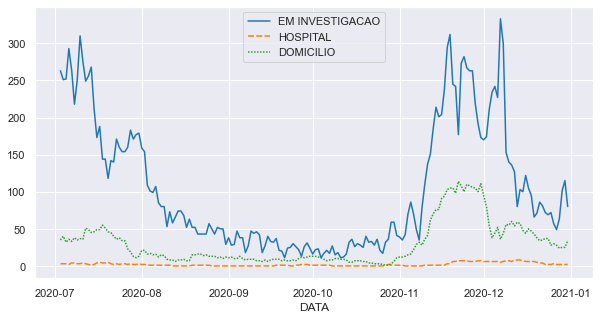

In [16]:
sns.lineplot(data=frame[['EM INVESTIGACAO', 'HOSPITAL', 'DOMICILIO']],
             palette="tab10"
            )
_ = ax.set_title("Santo Antônio da Platina - COVID-19")

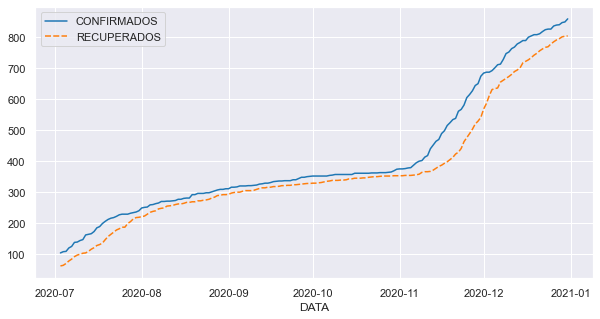

In [17]:
sns.lineplot(data=frame[['CONFIRMADOS','RECUPERADOS']],
             palette="tab10"
            )
_ = ax.set_title("Santo Antônio da Platina - COVID-19")

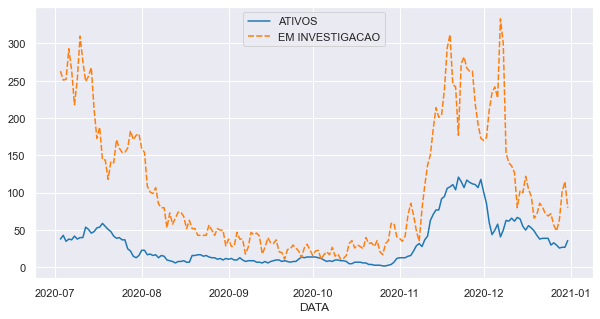

In [19]:
sns.lineplot(data=frame[['ATIVOS','EM INVESTIGACAO']],
             palette="tab10"
            )
_ = ax.set_title("Santo Antônio da Platina - COVID-19")

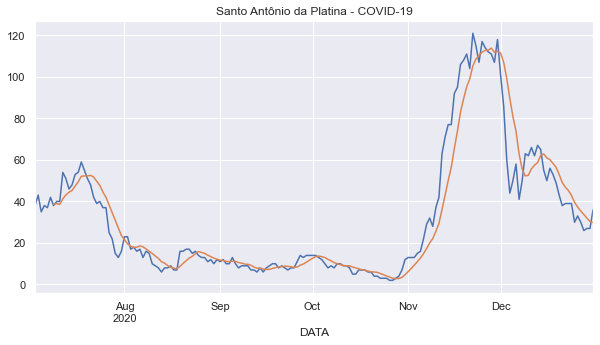

In [22]:
dias = 7

ax = frame['ATIVOS'].plot()
ax = frame['ATIVOS'].rolling(dias).mean().plot()

_ = ax.set_title(f"SAP - Covid-19 - Média Móvel {dias} dias")

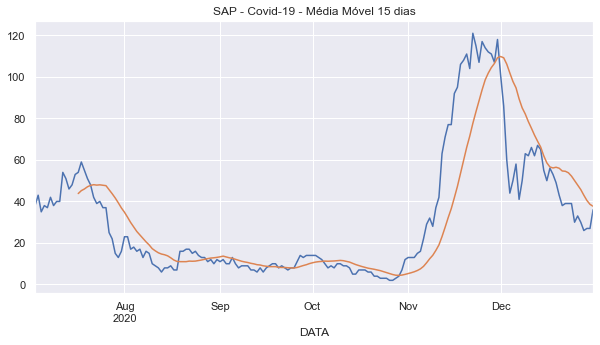

In [26]:
dias = 15

ax = frame['ATIVOS'].plot()
ax = frame['ATIVOS'].rolling(dias).mean().plot()

_ = ax.set_title(f"SAP - Covid-19 - Média Móvel {dias} dias")

In [28]:
def diff(x):
#     print(x)
    return x[1] - x[0]

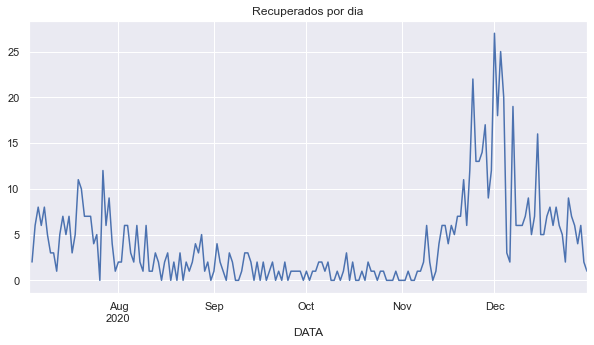

In [29]:
df = frame['RECUPERADOS'].rolling(2).apply(diff)

ax = df.plot()
_ = ax.set_title(f"Recuperados por dia")

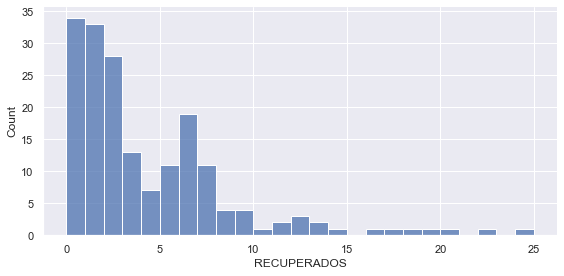

In [30]:
bins = range(0, 26)
ax = sns.displot(df, height=4, aspect=2, bins=bins)

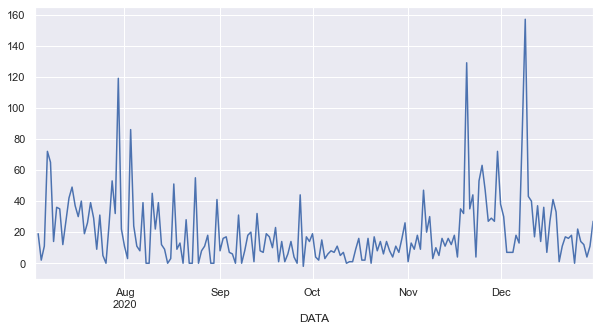

In [31]:
df = frame['DESCARTADOS'].rolling(2).apply(diff)

plt.figure(figsize=(10,5))

ax = df.plot()

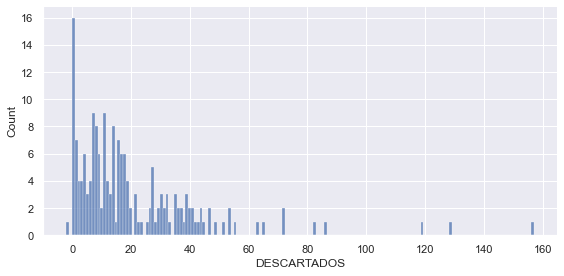

In [32]:
ax = sns.displot(df, height=4, aspect=2, bins=165)

In [33]:
df[df < 0]

DATA
2020-09-28   -2.0
Name: DESCARTADOS, dtype: float64

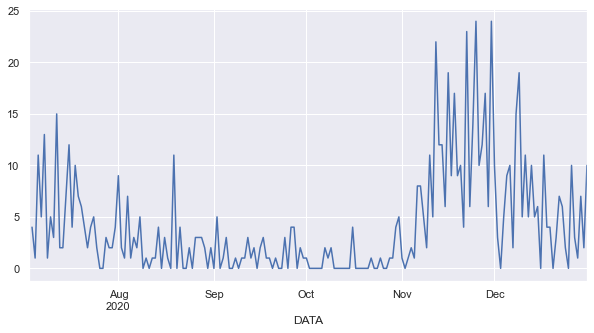

In [35]:
df = frame['CONFIRMADOS'].rolling(2).apply(diff)

plt.figure(figsize=(10,5))

ax = df.plot()

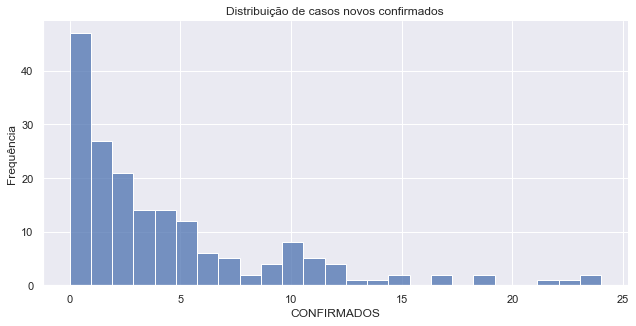

In [36]:
ax = sns.displot(df, height=4.5, aspect=2, bins=25)

ax.set_ylabels("Frequência")

ax.set(title = "Distribuição de casos novos confirmados")

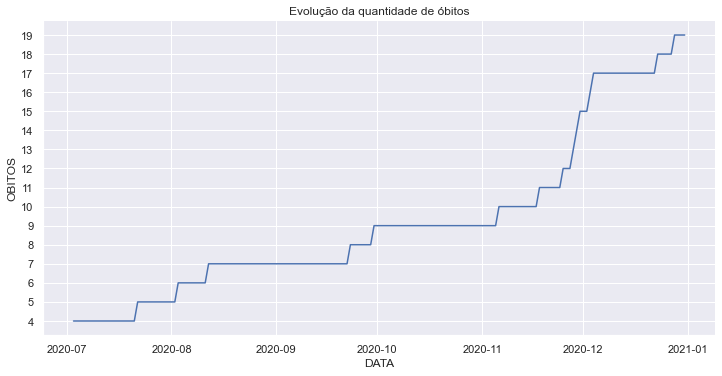

In [38]:
ax = sns.relplot(kind="line", data=frame['OBITOS'], height=5, aspect=2)

ax.set(yticks=range(4,20))

_ = ax.set(title="Evolução da quantidade de óbitos")